**Is there a relationship between a player1's first serve points won and their second serve points won in major tournaments?**

Intercept: [6.96288696]
Coefficient: [[0.30220143]]


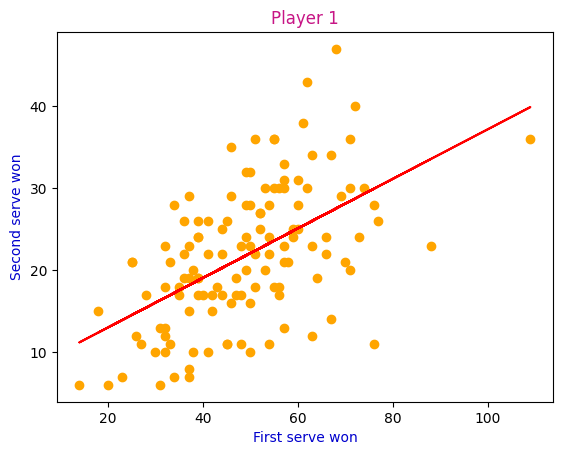

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("/content/AusOpen-men-2013.csv")

X = data[['FSW.1']]
y = data[['SSW.1']]
model = LinearRegression().fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

plt.scatter(X,y,color="orange")
plt.plot(X,model.predict(X),color="red")
plt.title("Player 1",color="MediumVioletRed")
plt.xlabel("First serve won",color="MediumBlue")
plt.ylabel("Second serve won",color="MediumBlue")
plt.show()

**How does the second serve percentage affect the outcome of a women tennis match in 2013?**

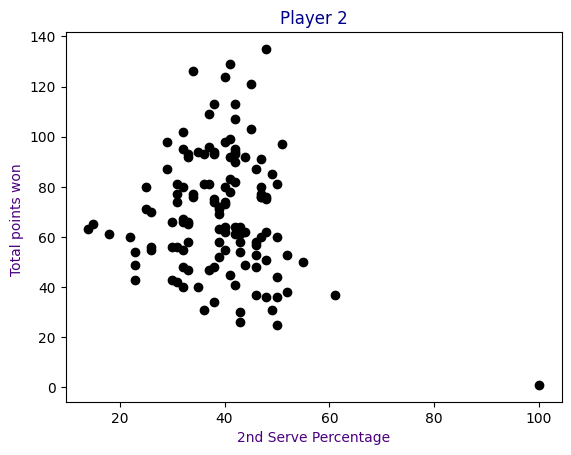

Correlation coefficient: -0.15801802231240297


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/AusOpen-women-2013.csv')

plt.scatter(df['SSP.2'], df['TPW.2'],color="Black")
plt.xlabel('2nd Serve Percentage',color="Indigo")
plt.ylabel('Total points won ',color="Indigo")
plt.title("Player 2",color="DarkBlue")
plt.show()

corr_coeff= df['SSP.2'].corr(df['TPW.2'])
print("Correlation coefficient:", corr_coeff)

The correlation coefficient is covariance divided by the product of the two variables' standard deviations.

**Does the number of aces served by a player1 impact their chances of winning the match?**

In [10]:
import pandas as pd

df = pd.read_csv('/content/FrenchOpen-men-2013.csv')

num = df[(df["ACE.1"] > 10) & (df.Result == 1)].shape[0]
den = df[df["ACE.1"] > 10].shape[0]
p_b_given_a = num / den

print(f"P(B | A) = {p_b_given_a:.2f}")

P(B | A) = 0.71


**Can we cluster the players based on their match statistics?**

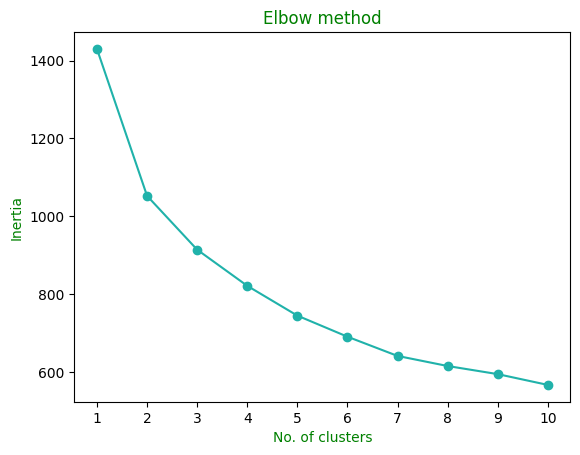

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df = pd.read_csv("/content/FrenchOpen-women-2013.csv")
df=df.drop(columns=["ST3.1","ST4.1","ST5.1","ST3.2","ST4.2","ST5.2"])

# select relevant features for clustering
features = ['FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1',
            'UFE.1', 'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'TPW.1']

#Dropping rows which have missing values
df=df.dropna(axis=0)

# normalize the data
scaler = StandardScaler()
data = scaler.fit_transform(df[features])

#Elbow method
sum_of_sq=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,n_init=10)
  kmeans.fit(data)
  sum_of_sq.append(kmeans.inertia_)

plt.plot(range(1,11),sum_of_sq,marker="o",color="LightSeaGreen")
plt.title("Elbow method",color="Green")
plt.xlabel("No. of clusters",color="Green")
plt.ylabel("Inertia",color="Green")
plt.xticks(range(1,11,1))
plt.show()

k=2 is optimal value

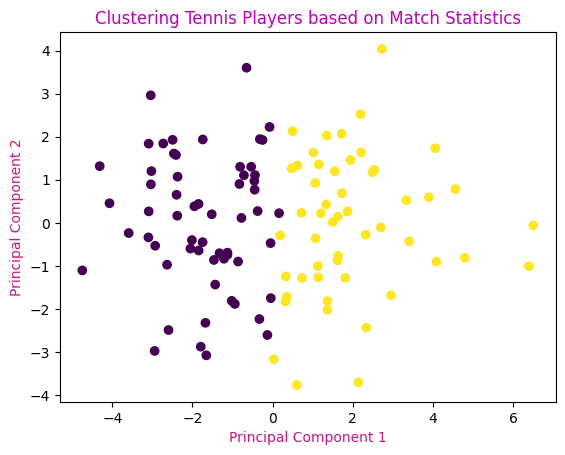

In [12]:
# apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0,n_init=100)
kmeans.fit(data)

df['cluster'] = kmeans.labels_

#Reducing the dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

plt.scatter(principal_components[:, 0], principal_components[:, 1],
            c=kmeans.labels_, cmap='viridis')
plt.title('Clustering Tennis Players based on Match Statistics',color="m")
plt.xlabel('Principal Component 1',color="MediumVioletRed")
plt.ylabel('Principal Component 2',color="MediumVioletRed")
plt.show()

**What is the probability distribution of a player winning a game when they have a break point opportunity?**

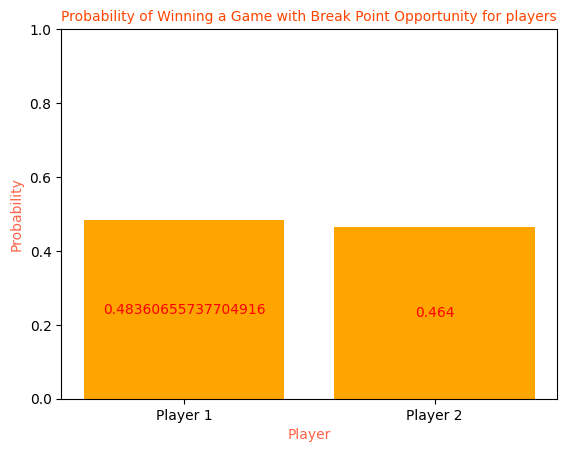

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/USOpen-men-2013.csv")

cols = ["Player1", "Player2", "Result", "BPC.1", "BPW.1", "BPC.2", "BPW.2"]
break_point_data = data[cols]

# remove rows with no break point opportunities
break_point_data = break_point_data[(break_point_data["BPC.1"] > 0) | (break_point_data["BPC.2"] > 0)]

# add a column indicating if player 1 won the game
break_point_data["player_1_won"] = break_point_data["Result"].apply(lambda x: x == 1)

# calculate the probability of winning a game given a break point opportunity
player_1_win_rate = break_point_data["player_1_won"][break_point_data["BPC.1"] > 0].mean()
player_2_win_rate = break_point_data["player_1_won"][break_point_data["BPC.2"] > 0].mean()

# plot the results
x=plt.bar(["Player 1", "Player 2"], [player_1_win_rate, player_2_win_rate],color="Orange")
plt.bar_label(x,labels=[player_1_win_rate,player_2_win_rate],label_type="center",color="r")
plt.ylim(0, 1)
plt.title("Probability of Winning a Game with Break Point Opportunity for players",size=10,color="OrangeRed")
plt.xlabel("Player",color="Tomato")
plt.ylabel("Probability",color="Tomato")
plt.show()

**Does a higher number of winners earned by a tennis player indicate a higher chance of winning the match?**

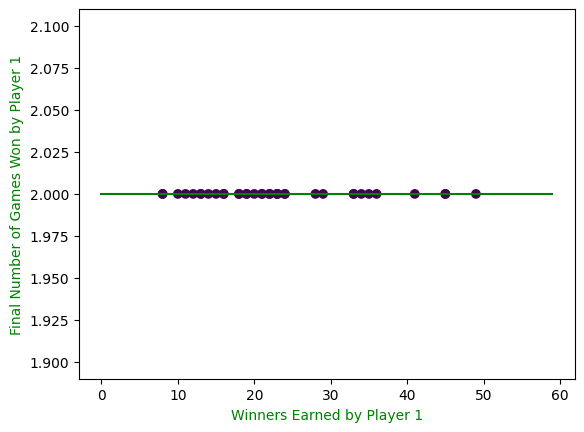

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

tennis_data = pd.read_csv("/content/USOpen-women-2013.csv")

player_1_wins = tennis_data[tennis_data["Result"] == 1]

plt.scatter(player_1_wins["WNR.1"], player_1_wins["FNL.1"], c=player_1_wins["Result"])
plt.xlabel("Winners Earned by Player 1",color="g")
plt.ylabel("Final Number of Games Won by Player 1",color="g")

# Fit a linear regression line to the data points
x = player_1_wins["WNR.1"].values.reshape(-1, 1)
y = player_1_wins["FNL.1"].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(x, y)

# Plot the linear regression line
x_range = np.arange(0, 60)
y_range = regressor.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_range, color="green")

plt.show()

**Who hit the most winners across all matches?**

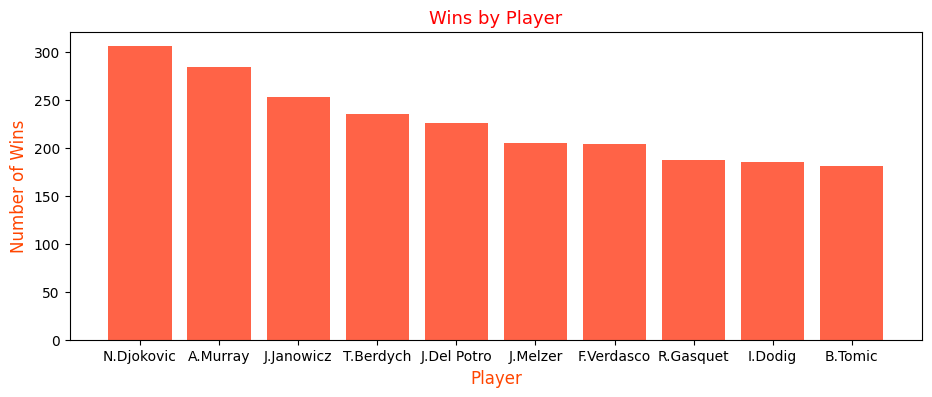

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Wimbledon-men-2013.csv")

winners = {}

for i in range(len(df)):
    player1 = df.iloc[i]['Player1']
    player2 = df.iloc[i]['Player2']
    wnr1 = df.iloc[i]['WNR.1']
    wnr2 = df.iloc[i]['WNR.2']
    
    if player1 not in winners:
        winners[player1] = wnr1
    else:
        winners[player1] += wnr1
        
    if player2 not in winners:
        winners[player2] = wnr2
    else:
        winners[player2] += wnr2

top_10 = sorted(winners.items(), key=lambda x: x[1], reverse=True)[:10]
keys=[item[0] for item in top_10]
values=[item[1] for item in top_10 ]

plt.figure(figsize=(11,4))
plt.bar(keys,values,color="Tomato")
plt.xlabel('Player',color="OrangeRed",size=12)
plt.ylabel('Number of Wins',color="OrangeRed",size=12)
plt.title('Wins by Player',color="red",size=13)
plt.show()

**Can we use clustering to identify distinct groups of tennis matches based on their statistical attributes, and if so, what insights can we gain from these groups?**

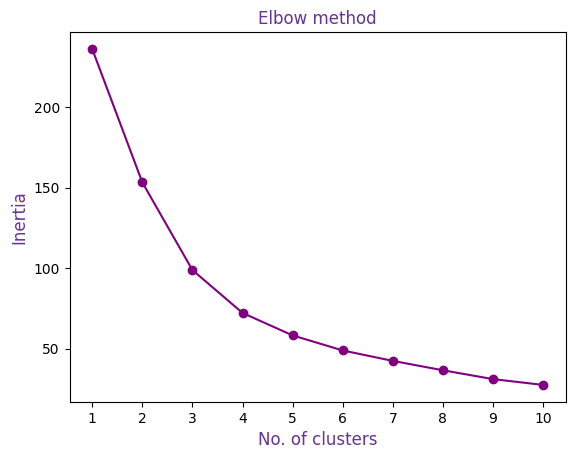

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/Wimbledon-women-2013.csv')
y=df[["ACE.1","DBF.1"]]
y=y.dropna(axis=0)
scaler=StandardScaler()
df_standard=scaler.fit_transform(y)

sum_of_sq=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,n_init=10)
  kmeans.fit(df_standard)
  sum_of_sq.append(kmeans.inertia_)

plt.plot(range(1,11),sum_of_sq,marker="o",color="Purple")
plt.title("Elbow method",color="RebeccaPurple")
plt.xlabel("No. of clusters",color="RebeccaPurple",size=12)
plt.ylabel("Inertia",color="RebeccaPurple",size=12)
plt.xticks(range(1,11,1))
plt.show()

3 is the good value for k

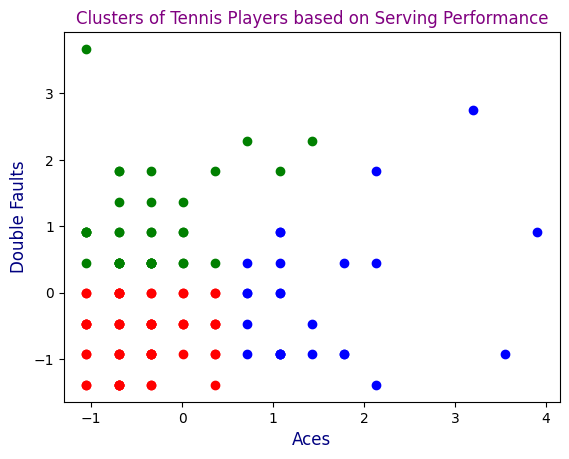

In [17]:
x=KMeans(n_clusters=3,n_init=10,random_state=0)
x.fit_predict(df_standard)

labels=x.labels_
colors=["r","b","g"]

for i in range(len(df_standard)):
  plt.scatter(df_standard[i][0],df_standard[i][1],color=colors[labels[i]])

plt.title('Clusters of Tennis Players based on Serving Performance',color="Purple")
plt.xlabel('Aces',color="Navy",size=12)
plt.ylabel('Double Faults',color="Navy",size=12)
plt.show()